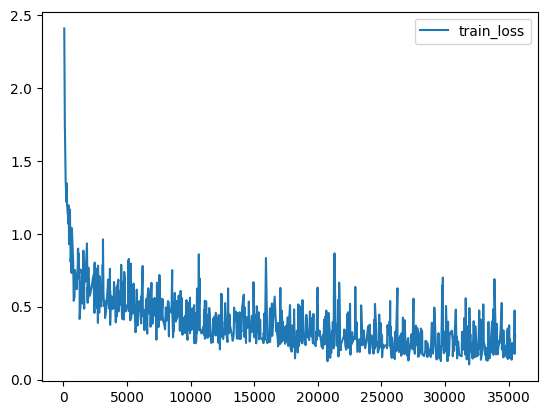

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

csv_file = './tensorboard_csv/run-pointpillar_copy_B_S_tensorboard-tag-train_loss.csv'
df = pd.read_csv(csv_file)

x_data = df.iloc[1:, 1].astype(float)
y_data = df.iloc[1:, 2].astype(float)

plt.plot(x_data, y_data, label='train_loss')
plt.legend()
plt.show()

0.5794216732024888 0.5460161566734314


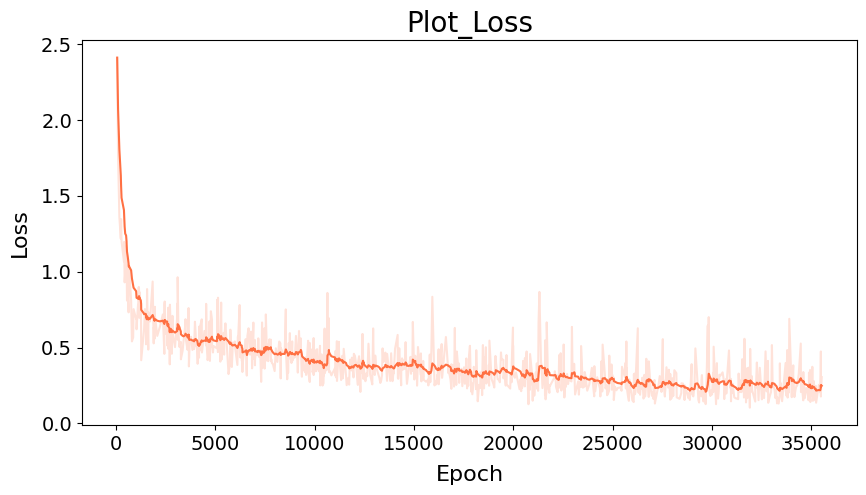

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Tuple
import pandas as pd
from matplotlib.axes import Axes
from matplotlib.figure import Figure
from typing import List, Dict
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator


def config_ax(ax: Axes, title: str = None, xlabel: str = None, ylabel: str = None,
              xlim: Tuple[float, float] = None, ylim: Tuple[float, float] = None,
              xticks: List[float] = None, xticks_labels: List[str] = None,
              yticks: List[float] = None, yticks_labels: List[str] = None,
              xticks_rotate90=False) -> None:
    if title is not None:
        ax.set_title(title, fontsize=20)
    if xlabel is not None:
        ax.set_xlabel(xlabel, labelpad=8, fontsize=16)
    if ylabel is not None:
        ax.set_ylabel(ylabel, labelpad=8, fontsize=16)
    if xlim is not None:
        ax.set_xlim(xlim)
    if ylim is not None:
        ax.set_ylim(ylim)
    if xticks is not None:
        ax.set_xticks(xticks, xticks_labels)
    if yticks is not None:
        ax.set_yticks(yticks, yticks_labels)
       
    ax.tick_params(axis="both", which="major", labelsize=14)
    #
    if xticks_rotate90:
        ax.tick_params(axis='x', which='major', rotation=90)



Item = Dict[str, float]  # e.g. step, loss


def read_tensorboard_file(fpath: str) -> Dict[str, List[Item]]:
    ea = EventAccumulator(fpath)
    ea.Reload()
    res = {}
    tags = ea.Tags()['scalars']
    for tag in tags:
        values = ea.Scalars(tag)
        _res = []
        for v in values:
            _res.append({"step": v.step, "value": v.value})
        res[tag] = _res
    return res


def _tensorboard_smoothing(values: List[float], smooth: float = 0.9) -> List[float]:
    norm_factor = smooth + 1
    values = np.array(values)
    x = values[0]
    res = [x]
    for i in range(1, len(values)):
        x = x * smooth + values[i] 
        res.append(x / norm_factor)
        #
        norm_factor *= smooth
        norm_factor += 1
    return res


if __name__ == "__main__":
    fpath = './tensorboard_csv/run-pointpillar_copy_B_S_tensorboard-tag-train_loss.csv'
    df = pd.read_csv(fpath)
    # loss = read_tensorboard_file(fpath)
    # v = [x["value"] for x in loss["train_loss"]]
    # step = [x["step"] for x in loss["train_loss"]]
    v = df.iloc[1:, 2].astype(float)
    step = df.iloc[1:, 1].astype(float)
    sv = _tensorboard_smoothing(v, smooth=0.9)    
    print(sv[490//5 - 1], v[490//5-1])

    def plot_loss():
        fig, ax = plt.subplots(figsize=(10, 5))
        cg, cb = "#FFE2D9", "#FF7043"
        config_ax(ax, title="Plot_Loss", xlabel="Epoch", ylabel="Loss")
        ax.plot(step, v, color=cg)
        ax.plot(step, sv, color=cb)
    plot_loss()
    plt.savefig("runs/1.png", dpi=500, bbox_inches='tight')
    # plt.show()



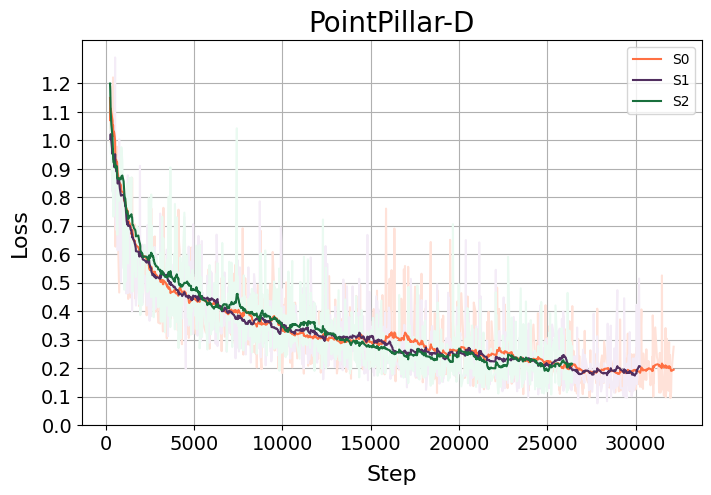

In [8]:
sub = 'D'
csv_path1 = './tensorboard_csv/run-pointpillar_copy_'+sub+'_S_tensorboard-tag-train_loss.csv'
# sub = 'C'
csv_path2 = './tensorboard_csv/run-pointpillar_copy_'+sub+'_S1_tensorboard-tag-train_loss.csv'
# sub = 'D'
csv_path3 = './tensorboard_csv/run-pointpillar_copy_'+sub+'_S2_tensorboard-tag-train_loss.csv'

df1 = pd.read_csv(csv_path1)
df2 = pd.read_csv(csv_path2)
df3 = pd.read_csv(csv_path3)

# 用上述的方法，分别读取三个csv文件，然后绘制在一张图上
v1 = df1.iloc[1:, 2].astype(float)
v2 = df2.iloc[1:, 2].astype(float)
v3 = df3.iloc[1:, 2].astype(float)

step1 = df1.iloc[1:, 1].astype(float)
step2 = df2.iloc[1:, 1].astype(float)
step3 = df3.iloc[1:, 1].astype(float)

hi = 1.3

# ignore outliner 
v1_valid_indices = np.where(v1 < hi)
v2_valid_indices = np.where(v2 < hi)
v3_valid_indices = np.where(v3 < hi)

# only keep the valid indices
v1 = np.array(v1)[v1_valid_indices]
v2 = np.array(v2)[v2_valid_indices]
v3 = np.array(v3)[v3_valid_indices]
step1 = np.array(step1)[v1_valid_indices]
step2 = np.array(step2)[v2_valid_indices]
step3 = np.array(step3)[v3_valid_indices]

sm = 0.95
sv1 = _tensorboard_smoothing(v1, smooth=sm)
sv2 = _tensorboard_smoothing(v2, smooth=sm)
sv3 = _tensorboard_smoothing(v3, smooth=sm)

fig, ax = plt.subplots(figsize=(8, 5))
cg0, cb0 = "#FFE2D9", "#FF7043"
cg1, cb1 = "#F4ECF7", "#512E5F"
cg2, cb2 = "#EAFAF1", "#196F3D"
config_ax(ax, title="PointPillar-"+sub, xlabel="Step", ylabel="Loss")
ax.plot(step1, v1, color=cg0)
ax.plot(step2, v2, color=cg1)
ax.plot(step3, v3, color=cg2 )
ax.plot(step1, sv1, color=cb0, label='S0')
ax.plot(step2, sv2, color=cb1, label='S1')
ax.plot(step3, sv3, color=cb2, label='S2')

# 添加网格
plt.grid(True)

plt.yticks(np.arange(0, min(hi,3), 0.1))
plt.legend()
plt.savefig("runs/"+sub+".png", dpi=500, bbox_inches='tight')
plt.show()



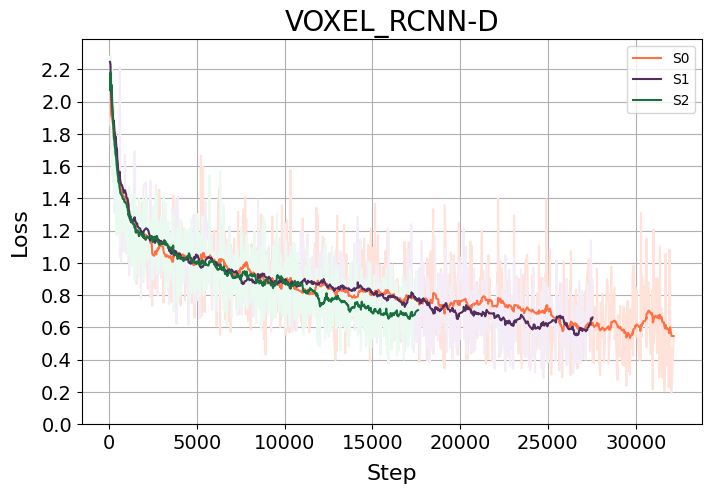

In [11]:
sub = 'D'
csv_path1 = './tensorboard_csv/run-voxel_rcnn_car_'+sub+'_S_tensorboard-tag-train_loss.csv'
# sub = 'C'
csv_path2 = './tensorboard_csv/run-voxel_rcnn_car_'+sub+'_S1_tensorboard-tag-train_loss.csv'
# sub = 'D'
csv_path3 = './tensorboard_csv/run-voxel_rcnn_car_'+sub+'_S2_tensorboard-tag-train_loss.csv'

df1 = pd.read_csv(csv_path1)
df2 = pd.read_csv(csv_path2)
df3 = pd.read_csv(csv_path3)

# 用上述的方法，分别读取三个csv文件，然后绘制在一张图上
v1 = df1.iloc[1:, 2].astype(float)
v2 = df2.iloc[1:, 2].astype(float)
v3 = df3.iloc[1:, 2].astype(float)

step1 = df1.iloc[1:, 1].astype(float)
step2 = df2.iloc[1:, 1].astype(float)
step3 = df3.iloc[1:, 1].astype(float)

hi = 2.3

# ignore outliner 
v1_valid_indices = np.where(v1 < hi)
v2_valid_indices = np.where(v2 < hi)
v3_valid_indices = np.where(v3 < hi)

# only keep the valid indices
v1 = np.array(v1)[v1_valid_indices]
v2 = np.array(v2)[v2_valid_indices]
v3 = np.array(v3)[v3_valid_indices]
step1 = np.array(step1)[v1_valid_indices]
step2 = np.array(step2)[v2_valid_indices]
step3 = np.array(step3)[v3_valid_indices]

sm = 0.95
sv1 = _tensorboard_smoothing(v1, smooth=sm)
sv2 = _tensorboard_smoothing(v2, smooth=sm)
sv3 = _tensorboard_smoothing(v3, smooth=sm)

fig, ax = plt.subplots(figsize=(8, 5))
cg0, cb0 = "#FFE2D9", "#FF7043"
cg1, cb1 = "#F4ECF7", "#512E5F"
cg2, cb2 = "#EAFAF1", "#196F3D"
config_ax(ax, title="VOXEL_RCNN-"+sub, xlabel="Step", ylabel="Loss")
ax.plot(step1, v1, color=cg0)
ax.plot(step2, v2, color=cg1)
ax.plot(step3, v3, color=cg2 )
ax.plot(step1, sv1, color=cb0, label='S0')
ax.plot(step2, sv2, color=cb1, label='S1')
ax.plot(step3, sv3, color=cb2, label='S2')
plt.grid(True)
plt.yticks(np.arange(0, min(hi,3), 0.2))
plt.legend()
plt.savefig("runs/vx"+sub+".png", dpi=500, bbox_inches='tight')
plt.show()



In [6]:
plt.savefig("runs/A.png", dpi=500, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>